In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data,targets = make_blobs(cluster_std=[1.34,1.5,1.5])

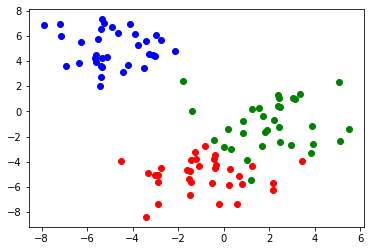

In [5]:
datax = [[]for i in range(3)]
datay = [[]for i in range(3)]
for i,c in zip(range(3),['b','g','r']):
    datax[i] = [d[0] for j,d in enumerate(data) if targets[j] == i]
    datay[i] = [d[1] for j,d in enumerate(data) if targets[j] == i]
    plt.plot(datax[i],datay[i],'o',color=c)


In [6]:
def clustering1(data,K,tol,means=None): ## K-means algorithm
    if means != None:
        data_mean_dist = np.array([[np.linalg.norm(d-m) for m in means] for d in data[0]])
        data_rele = np.array([[int(d == min(data_mean_dist[i][j])) for j,m in enumerate(means)] \
                     for i,d in enumerate(data[0])]) 
        means_next = [[] for i in range(len(K))]
        for j,m in enumerate(means_next): 
            m.append(np.dot(data_rele[:,j],data_mean_dist[:,j]))
        if np.linalg.norm(means-means_next) > tol:
            return means_next
        return clustering(data,K,tol,means=means_next)
    data_x = [data[0][:,0] for j in range(len(data))]
    data_y = [data[0][:,1] for j in range(len(data))]
    x_range = (min(data_x),max(data_x))
    y_range = (min(data_y),max(data_y))
    means = np.random.rand(K,2)*np.array([x_range[1]-x_range[0],y_range[1]-y_range[0]]) - \
                                        np.array([(x_range[0]+x_range[1])/2,(y_range[0]+y_range[1])/2])
    return clustering1(data,K,tol,means=means)